In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT FRAMEWORK**

In [2]:
import numpy as np               # Operasi numerik dan array
import pandas as pd              # Manipulasi data tabular
import os                        # Interaksi dengan sistem operasi
import seaborn as sns             # Visualisasi statistik
import matplotlib.pyplot as plt  # Pembuatan plot dan grafik
import librosa                   # Analisis audio
import librosa.display           # Visualisasi fitur audio
from IPython.display import Audio # Pemutaran audio dalam IPython
import warnings                  # Manajemen peringatan
warnings.filterwarnings('ignore')  # Penyaringan peringatan untuk tampilan bersih


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **SET DIREKTORI**

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input/suara-suku-indonesia'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
#Setelah masuk ke direktori kita split , ambil nama depan dan hilangkan .wavnya untuk pelabelan      
        label = filename.split('-')[0]
        label = label.split('.')[0]
        labels.append(label.lower())
    
print('work')

work


In [4]:
paths[:5]

['/kaggle/input/suara-suku-indonesia/JADI/DAYAKWAV/dayak-26.wav',
 '/kaggle/input/suara-suku-indonesia/JADI/DAYAKWAV/dayak-64.wav',
 '/kaggle/input/suara-suku-indonesia/JADI/DAYAKWAV/dayak-57.wav',
 '/kaggle/input/suara-suku-indonesia/JADI/DAYAKWAV/dayak-46.wav',
 '/kaggle/input/suara-suku-indonesia/JADI/DAYAKWAV/dayak-32.wav']

In [5]:
labels[:5]

['dayak', 'dayak', 'dayak', 'dayak', 'dayak']

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

speech  label
0  /kaggle/input/suara-suku-indonesia/JADI/DAYAKW...  dayak
1  /kaggle/input/suara-suku-indonesia/JADI/DAYAKW...  dayak
2  /kaggle/input/suara-suku-indonesia/JADI/DAYAKW...  dayak
3  /kaggle/input/suara-suku-indonesia/JADI/DAYAKW...  dayak
4  /kaggle/input/suara-suku-indonesia/JADI/DAYAKW...  dayak

In [7]:
df['label'].value_counts()

label
dayak    100
jawa     100
sunda    100
bugis    100
nias     100
Name: count, dtype: int64

In [8]:
# Mengambil nama direktori terakhir dari path
dirdataset = os.path.dirname(dirname)

label_counts = df['label'].value_counts()
# Menampilkan output label dan jumlah sesuai format yang diinginkan
for label, count in label_counts.items():
   
    print(f"Suku: {label} | Direktori: {dirdataset} | Jumlah: {count}")

Suku: dayak | Direktori: /kaggle/input/suara-suku-indonesia/JADI | Jumlah: 100
Suku: jawa | Direktori: /kaggle/input/suara-suku-indonesia/JADI | Jumlah: 100
Suku: sunda | Direktori: /kaggle/input/suara-suku-indonesia/JADI | Jumlah: 100
Suku: bugis | Direktori: /kaggle/input/suara-suku-indonesia/JADI | Jumlah: 100
Suku: nias | Direktori: /kaggle/input/suara-suku-indonesia/JADI | Jumlah: 100


<Axes: xlabel='label', ylabel='count'>

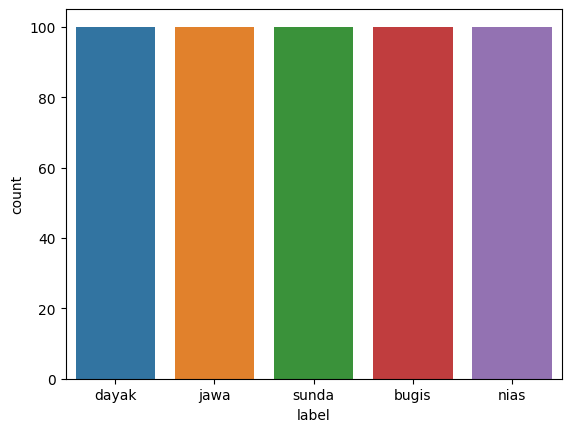

In [9]:
sns.countplot(data=df, x='label')

# **MENYIAPKAN SETUP DARI FRAMEWORK LIBROSA**

In [10]:
def waveplot(data, sr, suku):
    plt.figure(figsize=(10,4))
    plt.title(suku, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    #
def spectogram(data, sr, suku):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(suku, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
print('work')

work


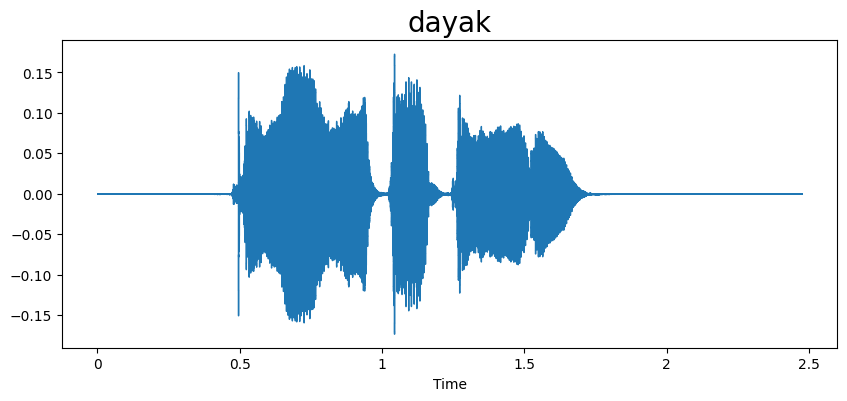

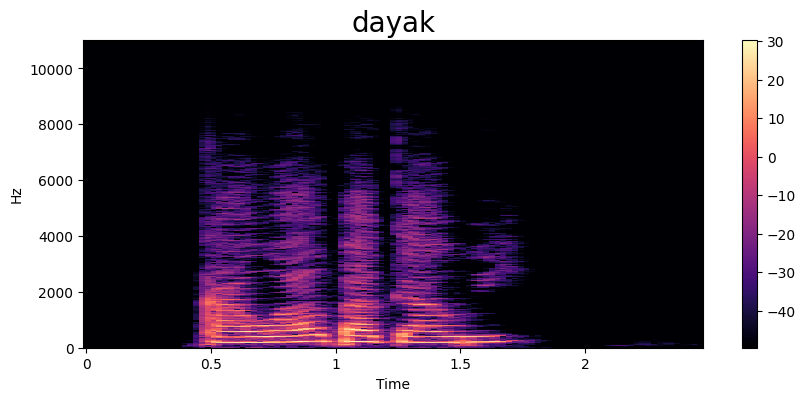

In [11]:
suku = 'dayak'
path = df['speech'][df['label']== suku][0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, suku)
spectogram(data, sampling_rate, suku)
Audio(path)

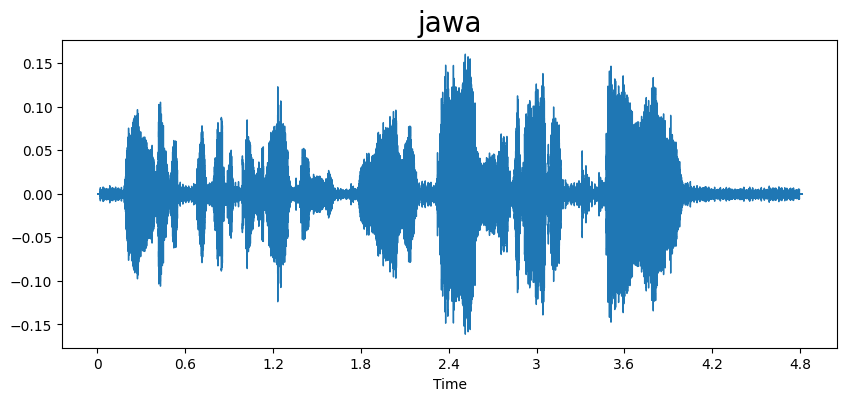

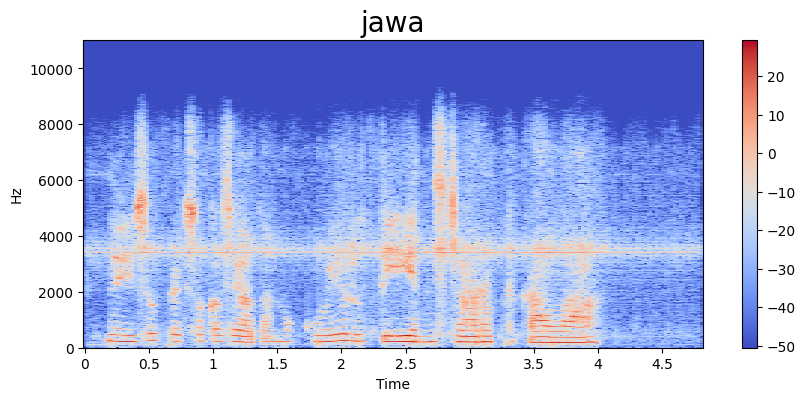

In [12]:
suku = 'jawa'
path = np.array(df['speech'][df['label']==suku])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, suku)
spectogram(data, sampling_rate, suku)
Audio(path)

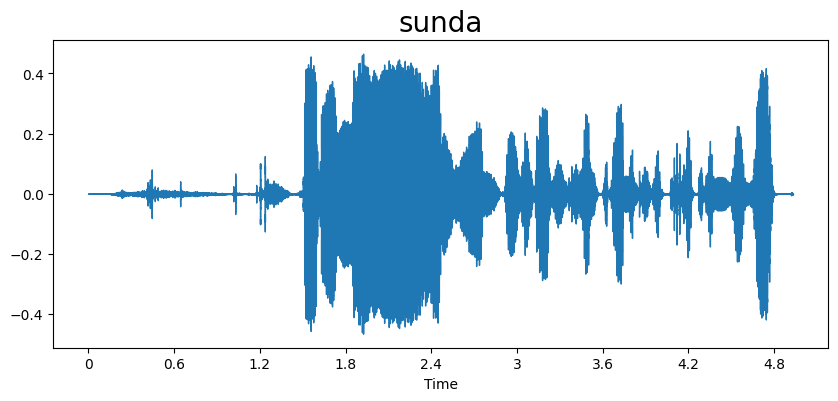

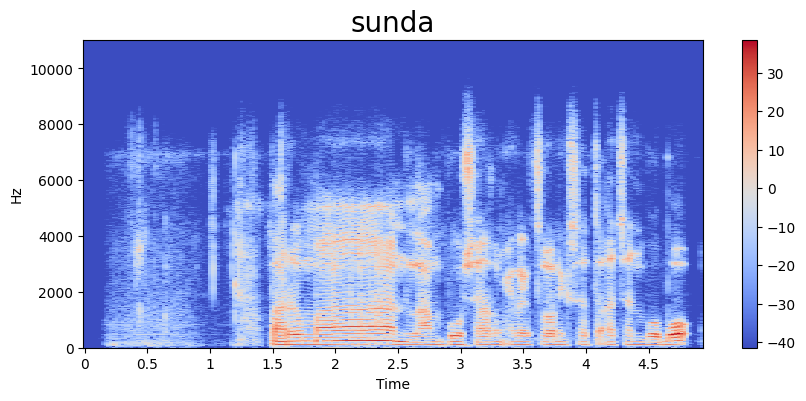

In [13]:
suku = 'sunda'
path = np.array(df['speech'][df['label']==suku])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, suku)
spectogram(data, sampling_rate, suku)
Audio(path)

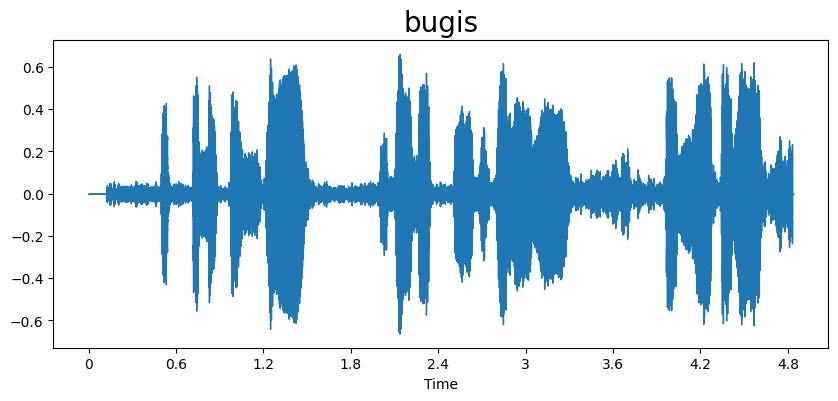

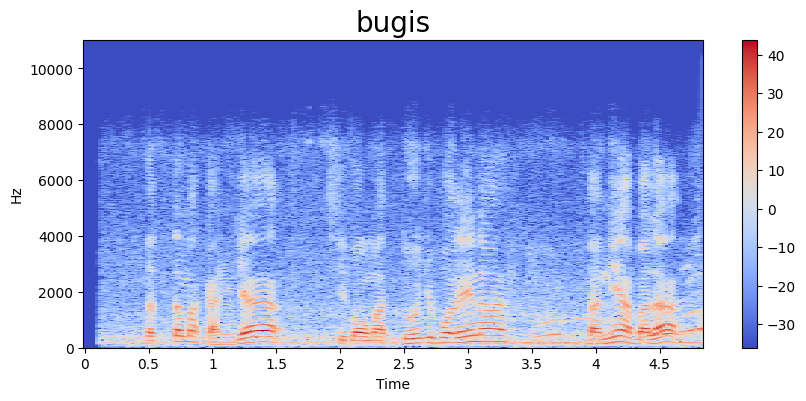

In [14]:
suku = 'bugis'
path = np.array(df['speech'][df['label']==suku])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, suku)
spectogram(data, sampling_rate, suku)
Audio(path)

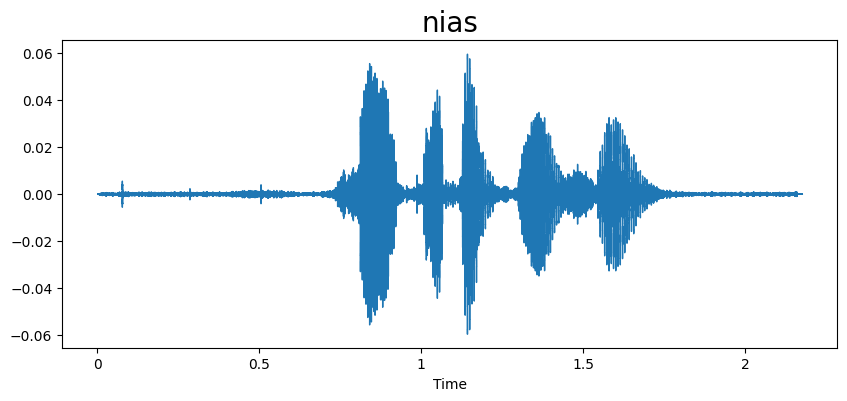

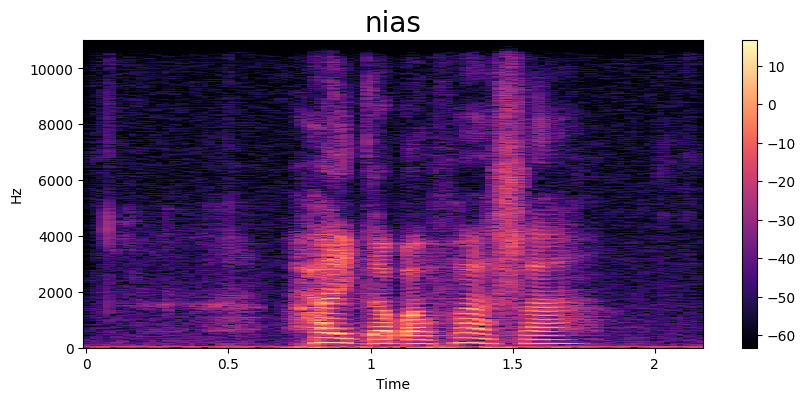

In [15]:
suku = 'nias'
path = np.array(df['speech'][df['label']==suku])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, suku)
spectogram(data, sampling_rate, suku)
Audio(path)

In [16]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=7, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-5.3243481e+02,  9.6365257e+01, -2.7386694e+00,  2.6124929e+01,
       -1.4641183e+01,  3.3592495e-01, -3.7137799e+00, -7.5579052e+00,
       -7.0999627e+00, -8.2773886e+00, -1.0545681e+00, -4.7004719e+00,
       -7.2685542e+00, -1.0731792e+01, -6.8181033e+00, -2.7206283e+00,
       -8.5499277e+00, -6.2839227e+00, -6.0007286e-01, -6.6932673e+00,
       -7.8236008e+00, -5.7216468e+00, -8.2411337e+00, -5.0051770e+00,
       -4.5425060e-01, -5.8918948e+00, -5.5352712e+00, -3.0698357e+00,
       -3.0749176e+00, -9.3157381e-01,  1.2080042e+00,  3.6979573e+00,
        6.1360202e+00,  1.1097706e+01,  1.2358349e+01,  1.2989348e+01,
        5.6941538e+00,  3.4794931e+00,  8.9314973e-01, -5.7571273e+00],
      dtype=float32)

In [18]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [19]:
X_mfcc
df['nomor'] = df.index + 1
df = pd.concat([df, X_mfcc], axis=1)
df.to_csv("xmfcc.csv", index=False)

In [20]:
X =[x for x in X_mfcc]
X = np.array(X)
X.shape

(500, 40)

In [21]:
X = np.expand_dims(X, -1)
X.shape

(500, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y = y.toarray()

In [24]:
y.shape

(500, 5)

In [25]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

model_cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(40, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # Jumlah kelas Anda
])

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

# Simpan model setelah pelatihan
model_cnn.save("/kaggle/working/model_cnn.h5")  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 64)             0         
 g1D)                                                            
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                        

Epoch 1/250
13/13 [==============================] - 4s 28ms/step - loss: 2.6516 - accuracy: 0.2175 - val_loss: 1.6617 - val_accuracy: 0.3700
Epoch 2/250
13/13 [==============================] - 0s 6ms/step - loss: 1.7378 - accuracy: 0.2900 - val_loss: 1.4318 - val_accuracy: 0.4200
Epoch 3/250
13/13 [==============================] - 0s 6ms/step - loss: 1.4425 - accuracy: 0.3975 - val_loss: 1.2490 - val_accuracy: 0.5700
Epoch 4/250
13/13 [==============================] - 0s 6ms/step - loss: 1.2329 - accuracy: 0.5575 - val_loss: 1.1098 - val_accuracy: 0.6300
Epoch 5/250
13/13 [==============================] - 0s 6ms/step - loss: 1.0874 - accuracy: 0.6150 - val_loss: 0.9650 - val_accuracy: 0.7100
Epoch 6/250
13/13 [==============================] - 0s 6ms/step - loss: 0.9293 - accuracy: 0.6975 - val_loss: 0.8257 - val_accuracy: 0.7500
Epoch 7/250
13/13 [==============================] - 0s 6ms/step - loss: 0.8615 - accuracy: 0.6950 - val_loss: 0.7127 - val_accuracy: 0.7900
Epoch 8/250


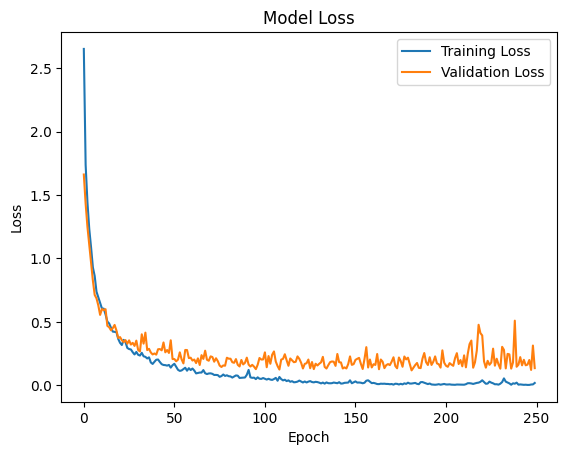

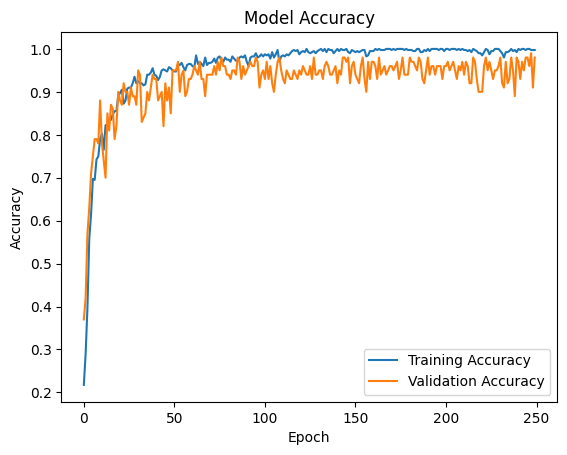

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan pelatihan model
history_cnn = model_cnn.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_val, y_val))

# Plot history loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot history accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Prediksi menggunakan model pada data validasi
y_val_pred = model_cnn.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
precision = precision_score(y_val_true_classes, y_val_pred_classes, average='weighted')
recall = recall_score(y_val_true_classes, y_val_pred_classes, average='weighted')
f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')

# Menampilkan metrik evaluasi
print("\nAccuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))




4/4 [==============================] - 0s 2ms/step
Confusion Matrix:
[[23  0  0  0  1]
 [ 0 27  0  1  0]
 [ 0  0 14  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 10]]

Accuracy: 0.9800
Precision: 0.9813
Recall: 0.9800
F1 Score: 0.9801


In [28]:
import os
import numpy as np
import pandas as pd
import librosa
import cv2
from tensorflow.keras.models import load_model
from IPython.display import Audio



# Load model yang sudah dilatih
model_path = '/kaggle/working/model_cnn.h5' 
model = load_model(model_path)

# Fungsi untuk melakukan prediksi
def predict_audio(path):
    # Ekstrak fitur MFCC dari file audio
    y, sr = librosa.load(path, duration=7, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    mfcc = np.expand_dims(mfcc, axis=0)

    # Lakukan prediksi menggunakan model
    result = model.predict(mfcc, verbose=0)
    class_index = np.argmax(result)

    classes = ['bugis', 'dayak', 'jawa', 'nias', 'sunda']  
    predicted_class = classes[class_index]

    return predicted_class

# Direktori audio yang akan diuji
audio_directory = '/kaggle/input/data-testing/TESTINGMODEL/'  

# audio_directory = '/kaggle/input/data-testing/TESTINGMODEL/'  
# Inisialisasi variabel untuk menghitung akurasi
total_files = 0
correct_predictions = 0

# List untuk menyimpan hasil prediksi
results_table = []

# Loop setiap file audio
for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        real = filename.split('-')[0].title()

        audio_path = os.path.join(audio_directory, filename)
        prediction = predict_audio(audio_path)

        total_files += 1
        if prediction.lower() == real.lower():
            correct_predictions += 1

        results_table.append([total_files, filename, prediction, real])
    else:
        print(f'Skip {filename}: Format tidak mendukung')

# Print tabel hasil prediksi
headers = ["No", "Filename", "Prediction", "Real"]
df_results = pd.DataFrame(results_table, columns=headers)
print(df_results)

# Hitung dan print akurasi
accuracy = (correct_predictions / total_files) * 100
print(f'Akurasi: {accuracy:.2f}% akurat ({correct_predictions} dari {total_files} file uji coba)')

    No      Filename Prediction   Real
0    1   nias-02.wav      bugis   Nias
1    2   jawa-03.wav      bugis   Jawa
2    3   jawa-02.wav      bugis   Jawa
3    4  dayak-02.wav      bugis  Dayak
4    5  bugis-62.wav      bugis  Bugis
5    6  bugis-64.wav      bugis  Bugis
6    7  sunda-53.wav      bugis  Sunda
7    8  sunda-56.wav      bugis  Sunda
8    9   nias-01.wav      bugis   Nias
9   10   jawa-05.wav      bugis   Jawa
10  11  dayak-01.wav      bugis  Dayak
11  12   nias-04.wav      bugis   Nias
12  13   jawa-01.wav      bugis   Jawa
13  14  bugis-65.wav      bugis  Bugis
14  15  bugis-63.wav      bugis  Bugis
15  16   nias-03.wav      bugis   Nias
16  17  dayak-03.wav      bugis  Dayak
17  18   nias-05.wav      bugis   Nias
18  19   jawa-04.wav      bugis   Jawa
19  20  sunda-54.wav      bugis  Sunda
20  21  dayak-04.wav      bugis  Dayak
21  22  sunda-55.wav      bugis  Sunda
22  23  dayak-05.wav      bugis  Dayak
23  24  bugis-66.wav      bugis  Bugis
24  25  sunda-52.wav     

In [29]:
#lstm
#from keras.models import Sequential
#from keras.layers import Dense, LSTM, Dropout

#model = Sequential([
    #LSTM(256, return_sequences=False, input_shape=(40,1)),
    #Dense(64, activation='relu'),
    #Dropout(0.2),
    #Dense(32, activation='relu'),
    #Dropout(0.2),
    #Dense(5, activation='softmax')
#])

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [30]:
#history = model.fit(X ,y, validation_split=0.2, epochs=250, batch_size=512, shuffle=True)

In [31]:
#epochs = list(range(250))
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

#plt.plot(epochs, acc, label='train accuracy')
#plt.plot(epochs, val_acc, label='val accuracy')
#plt.xlabel('epohcs')
#plt.ylabel('accuracy')
#plt.legend()
#plt.show

In [32]:
#loss = history.history['loss']
#val_loss = history.history['val_loss']

#plt.plot(epochs, loss, label='train loss')
#plt.plot(epochs, val_loss, label='val loss')
#plt.xlabel('epohcs')
#plt.ylabel('loss')
#plt.legend()
#plt.show